In [3]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import csv

#----------------------setting---------------------------#
ecg_filename = "time_ecg_rpeak_yeopdata"
rr_filename = "rrinterval_hrate_yeopdata"
#--------------------------------------------------------#

#ecg_ values
ecg_header = []
ecg_time = []
ecg_code = []
rpeak_time = []
rpeak_code = []
peak_index = []

#rr_values
rr_header = []
rr_index = []
rr_interval = []
hr_data = []

In [5]:
def read_ecg_from_csv(ecg_filename):
    filename = "data/"+ecg_filename+".csv"
    with open (filename,'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        ecg_header.append(reader.next())
        for row in reader:
            ecg_time.append(row[0])
            ecg_code.append(int(row[1]))
            rpeak_time.append(row[2])
            rpeak_code.append(row[3])
            if row[3] != "0":
                peak_index.append(row)

In [6]:
def read_rr_from_csv(rr_filename):
    filename = "data/"+rr_filename+".csv"
    with open (filename,'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        rr_header.append(reader.next())
        for row in reader:
            rr_index.append(int(row[0]))
            rr_float = float(row[1])
            rr_interval.append(rr_float)
            hr_data.append((60*1000)/rr_float)

In [7]:
def get_hr_data(rr_interval) :
    for i in rr_interval:
        rr_interval[i] = int(rr_interval[i])
        hr_data.append = (60*1000)/rr_interval[i]

In [8]:
read_ecg_from_csv(ecg_filename)
read_rr_from_csv(rr_filename)

In [9]:
print("peak_point_number : " + str(len(peak_index))+
      "\necg_data_number : "+str(len(ecg_time))+
     "\nrr_index_number : "+str(len(rr_index))+
     "\necg_header : "+ str(ecg_header)+
     "\nrr_header : "+ str(rr_header))

peak_point_number : 2865
ecg_data_number : 587648
rr_index_number : 2863
ecg_header : [['Time(H:M:S) - ECG', 'Code - ECG', 'Time(H:M:S) - R-Peak', 'Code - R-Peak']]
rr_header : [['History Index - RR', 'R-R Interval(ms) - RR', '']]


In [20]:
ecg_index = [len(ecg_time)]

for i in ecg_index
    ecg_index[i] = i

plt.plot(ecg_index , ecg_code,'g-')
plt.xlabel('ECG_index')
plt.ylabel('ECG_code')
plt.show()

SyntaxError: invalid syntax (<ipython-input-20-bafa1945d2ea>, line 3)

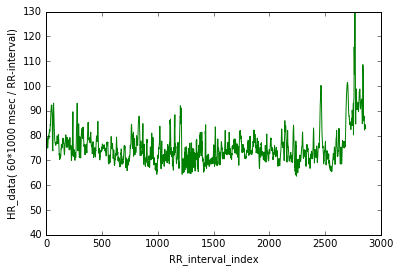

In [10]:
plt.plot(rr_index,hr_data,'g-')
plt.xlabel('RR_interval_index')
plt.ylabel('HR_data( 60*1000 msec / RR-interval)')
plt.ylim(40.0, 130.0)
plt.show()

In [11]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def to_ndarray(list):
    lgt = len(list)
    x = np.zeros((1,lgt),dtype ='float')
    for i in range(0,lgt):
        x[0,i]=list[i]
    return x

# for test y = 1/x, switch Code <-->Markdown
rr_index = np.linspace(0.2, 0.8, 101)
hr_data = map(lambda x: 1/x, rr_index)
#copy & paste below data : x_test = np.linspace(0.2, 0.8, 10*len(rr_index))
#backup_code : x_test = np.linspace(0 ,len(rr_index),10*len(rr_index))

In [12]:
x_data = to_ndarray(rr_index)
y_data = to_ndarray(hr_data)

In [13]:
#setting parameters
hiddenDim = 10
training_step = 2001
rate = 0.01

In [14]:
W = weight_variable([hiddenDim,1])
b = bias_variable([hiddenDim,1])

W2 = weight_variable([1,hiddenDim])
b2 = bias_variable([1])

X = tf.placeholder("float",[1,None])

hidden = tf.nn.sigmoid(tf.matmul(W,X)+b)
regression = tf.matmul(W2,hidden) + b2

loss = tf.reduce_mean(tf.square( y_data - regression))

step = tf.Variable(0,trainable=False)
#rate = tf.train.exponential_decay(0.15, step,1, 0.9999)

optimizer = tf.train.AdamOptimizer(rate)
train = optimizer.minimize(loss, global_step = step)

In [15]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

start_time = time.time()
for step in xrange(training_step):
    train.run({X: x_data},sess)
    if step % 100 == 0:
        print step, loss.eval({X: x_data},sess)
        
excute_time = time.time() - start_time

0 5666.46
100 4108.45
200 2919.31
300 2028.37
400 1373.16
500 905.358
600 582.897
700 369.268
800 233.814
900 151.926
1000 104.889
1100 79.2972
1200 66.144
1300 59.7738
1400 56.8736
1500 55.6351
1600 55.1402
1700 54.9553
1800 54.8909
1900 54.8698
2000 54.8631


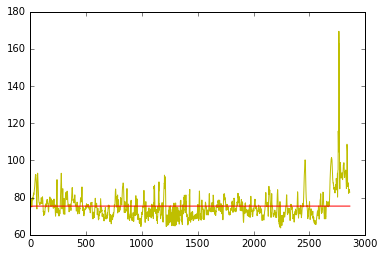


Sample number :  2862
learning rates :  0.01
Training steps :  2000
Hidden dimentions :  10
Final loss value :  54.8631
Excute time :  7.21302604675  sec


In [16]:
x_test = np.linspace(0 ,len(rr_index),10*len(rr_index))
y_test = regression.eval({X:to_ndarray(x_test)},sess)

plt.plot(rr_index,hr_data,'y-')
plt.plot(x_test,y_test.transpose().tolist(),'r-')
plt.show()
print "\nSample number : ", len(rr_index) -1 
print "learning rates : ", rate
print "Training steps : ", training_step -1
print "Hidden dimentions : ", hiddenDim
print "Final loss value : ", loss.eval({X: x_data},sess)
print "Excute time : ", excute_time , " sec"